    This notebook serves to prepare the data from the following study, for display in a digital format:
    
    https://www.medrxiv.org/content/10.1101/2021.08.24.21262415v1.full.pdf
    
    This study is sometimes referred to as the Israel Covid Study, and is titled 'Comparing SARS-CoV-2 natural immunity to vaccine-induced immunity: reinfections versus breakthrough infections'

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

import seaborn as sns
sns.set_style("dark")

import re

    Define constants and control variables

In [2]:
DATA_PATH = '../../data/'

    Dataframe representing the following information.
    
    Table 1a. Characteristics of study population, model 1 and 2.
    
    Table 1b. Characteristics of study population, model 3.
    
    Legend

        SD – Standard Deviation; SES – Socioeconomic status on a scale from 1 (lowest) to 10; 
        CVD – Cardiovascular Diseases; 
        DM – Diabetes Mellitus; 
        CKD – Chronic Kidney Disease; 
        COPD – Chronic Obstructive Pulmonary Disease.

In [2]:
char_index=[
    '1 – Previously infected with matching of time of first event', 
    '1 - Vaccinated individuals with matching of time of first event',
    '2 – Previously infected without matching of time of first event', 
    '2 - Previously infected and vaccinated individuals without matching of time of first event' ,
    '3 - Previously infected', 
    '3 - Previously infected and single dose vaccinated'      
]

char_columns = ['Count(n)',
    'Age, mean',
    'Age, SD',
    '# 16-39 yr',
    '% 16-39 yr',
    '# 40-59 yr' ,
    '% 40-59 yr' ,
    '# >= 60 yr',
    '% >= 60 yr',
    '# Female.',
    '% Female' ,
    '# Male' ,
    '% Male' ,
    'SES, mean' ,
    'SES, SD'
]
    
char_data = [
    [16215, 36.1, 13.9, 9889, 61, 5536, 34.1, 790, 4.9, 7428, 45.8, 8787, 54.2, 5.5, 1.9],
    [16215, 36.1, 13.9, 9889, 61, 5536, 34.1, 790, 4.9, 7428, 45.8, 8787, 54.2, 5.5, 1.9],
    [46035, 36.1, 14.7, 28157, 61.2, 14973, 32.5, 2905, 6.3, 22661, 49.2, 23374, 50.8, 5.3, 1.9],
    [46035, 36.1, 14.7, 28157, 61.2, 14973, 32.5, 2905, 6.3, 22661, 49.2, 23374, 50.8, 5.3, 1.9],
    [14029, 33.2, 14.0, 9543, 68.0, 3919, 27.9, 567, 4.0, 7467, 53.2, 6562, 46.8, 4.7, 1.9],
    [14029, 33.2, 14.0, 9543, 68.0, 3919, 27.9, 567, 4.0, 7467, 53.2, 6562, 46.8, 4.7, 1.9]
]
    
study_char_df = pd.DataFrame(index=char_index, columns=char_columns, data=char_data)
study_char_df.index.name = 'Model'

In [9]:
type(study_char_df.transpose())

pandas.core.frame.DataFrame

In [11]:
study_char_df.to_csv("../../data/study_characteristics.csv")

    Dataframe representing the following information.

    Table 2a. OR for SARS-CoV-2 infection, model 1, previously infected vs. vaccinated.
    
    Legend
    
        OR – Odds Ratio

In [13]:
or_index=[
    'Model 1 infection- Beta (β)',
    'Model 1 infection- OR (β)',
    'Model 1 infection- 95%CI low',
    'Model 1 infection- 95%CI high',
    'Model 1 infection- P-value',
    'Model 1 symptomatic- Beta (β)',
    'Model 1 symptomatic- OR (β)',
    'Model 1 symptomatic- 95%CI low',
    'Model 1 symptomatic- 95%CI high',
    'Model 1 symptomatic- P-value',
    'Model 2 infection- Beta (β)',
    'Model 2 infection- OR (β)',
    'Model 2 infection- 95%CI low',
    'Model 2 infection- 95%CI high',
    'Model 2 infection- P-value',
    'Model 2 symptomatic- Beta (β)',
    'Model 2 symptomatic- OR (β)',
    'Model 2 symptomatic- 95%CI low',
    'Model 2 symptomatic- 95%CI high',
    'Model 2 symptomatic- P-value'
]

or_columns = [
    'Previously infected',
    'Vaccinated',
    'SES',
    'Age group 16 to 39 yr',
    'Age group 40 to 59 yr' ,
    'Age group >= 60 yr',
    'Sex Female',
    'Sex Male' ,
]
    
or_data = [
    ['Ref', 2.57, 0.04, 'Ref', 0.05, 0.99, 'Ref', -0.03],
    ['Ref', 13.06, 1.04, 'Ref', 1.05, 2.7, 'Ref', 0.97],
    ['Ref', 8.08, .97, 'Ref', .78, 1.68, 'Ref', .76],
    ['Ref', 21.11, 1.11, 'Ref', 1.4, 4.34, 'Ref', 1.25],
    ['Ref', '<0.001', 0.251, 'Ref', 0.751, '<0.001', 'Ref', 0.841],
    
    ['Ref', 3.3, 0.04, 'Ref', 0.19, 1.06, 'Ref', -0.19],
    ['Ref', 27.02, 1.04, 'Ref', 1.21, 2.89, 'Ref', 0.82],
    ['Ref', 12.7, .96, 'Ref', .88, 1.68, 'Ref', .62],
    ['Ref', 57.5, 1.12, 'Ref', 1.67, 4.99, 'Ref', 1.1],
    ['Ref', '<0.001', 0.312, 'Ref', 0.25, '<0.001', 'Ref', .185],
    
    ['Ref', 1.78, 0.07, 'Ref', 0.06, 0.79, 'Ref', -0.01],
    ['Ref', 5.96, 1.07, 'Ref', 1.06, 2.2, 'Ref', 0.99],
    ['Ref', 4.85, 1.03, 'Ref', 0.9, 1.66, 'Ref', .85],
    ['Ref', 7.33, 1.11, 'Ref', 1.26, 2.92, 'Ref', 1.14],
    ['Ref', '<0.001', '<0.001', 'Ref', 0.481, '<0.001', 'Ref', .842],
    
    ['Ref', 1.96, 0.07, 'Ref', 0.09, 0.8, 'Ref', -0.02],
    ['Ref', 7.13, 1.07, 'Ref', 1.1, 2.23, 'Ref', 0.98],
    ['Ref', 5.51, 1.02, 'Ref', 0.9, 1.61, 'Ref', .82],
    ['Ref', 9.21, 1.12, 'Ref', 1.33, 3.09, 'Ref', 1.16],
    ['Ref', '<0.001', 0.003, 'Ref', 0.35, '<0.001', 'Ref', .785] 
]
    
or_df = pd.DataFrame(index=or_index, columns=or_columns, data=or_data)

In [14]:
or_df

,Previously infected,Vaccinated,SES,Age group 16 to 39 yr,Age group 40 to 59 yr,Age group >= 60 yr,Sex Female,Sex Male
Model 1 infection- Beta (β),Ref,2.57,0.04,Ref,0.050,0.99,Ref,-0.030
Model 1 infection- OR (β),Ref,13.06,1.04,Ref,1.050,2.7,Ref,0.970
Model 1 infection- 95%CI low,Ref,8.08,0.97,Ref,0.780,1.68,Ref,0.760
Model 1 infection- 95%CI high,Ref,21.11,1.11,Ref,1.400,4.34,Ref,1.250
Model 1 infection- P-value,Ref,<0.001,0.251,Ref,0.751,<0.001,Ref,0.841
Model 1 symptomatic- Beta (β),Ref,3.3,0.04,Ref,0.190,1.06,Ref,-0.190
Model 1 symptomatic- OR (β),Ref,27.02,1.04,Ref,1.210,2.89,Ref,0.820
Model 1 symptomatic- 95%CI low,Ref,12.7,0.96,Ref,0.880,1.68,Ref,0.620
Model 1 symptomatic- 95%CI high,Ref,57.5,1.12,Ref,1.670,4.99,Ref,1.100
Model 1 symptomatic- P-value,Ref,<0.001,0.312,Ref,0.250,<0.001,Ref,0.185


<AxesSubplot:title={'center':'Previously infected; Age group 16 to 39 yr; Sex Female, each used as reference point'}, ylabel='Model 1 infection- OR (β)'>

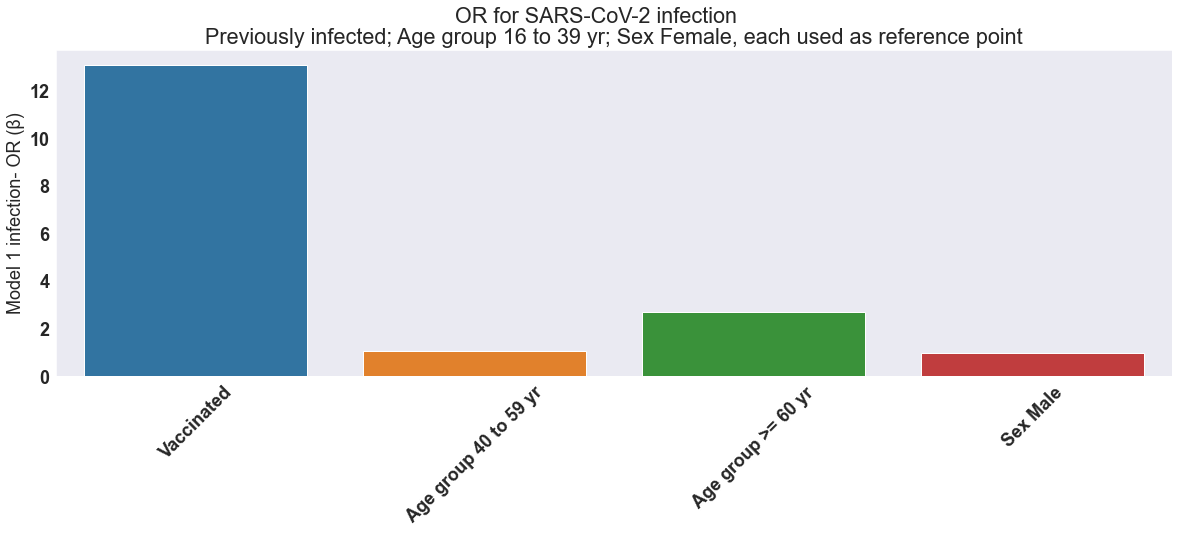

In [16]:
odds_ratio_model1i = or_df.iloc[1, [1,4,5,7] ]

fig = plt.figure(figsize=(20,6))

plt.title("Previously infected; Age group 16 to 39 yr; Sex Female, each used as reference point")
plt.suptitle("OR for SARS-CoV-2 infection")

plt.ylabel("odds ratio, by fold - (100% increase)")

plt.xticks(rotation=45)

sns.barplot(x=odds_ratio_model1i.index, y=odds_ratio_model1i)

In [17]:
odds_ratio_plot = or_df.iloc[[1,6,11,16], [1,4,5,7]]

prog = re.compile(".+?(?=-)")
odds_ratio_plot = odds_ratio_plot.rename(index=lambda x: re.match(prog, x)[0])

odds_ratio_plot.transpose()

,Model 1 infection,Model 1 symptomatic,Model 2 infection,Model 2 symptomatic
Vaccinated,13.06,27.02,5.96,7.13
Age group 40 to 59 yr,1.05,1.21,1.06,1.1
Age group >= 60 yr,2.7,2.89,2.2,2.23
Sex Male,0.97,0.82,0.99,0.98


In [21]:
odds_ratio_plot.transpose().to_csv(DATA_PATH + "odds_ratios_m1_m2.csv")

In [23]:
or_index=[
    'Model 3 infection- Beta (β)',
    'Model 3 infection- OR (β)',
    'Model 3 infection- 95%CI low',
    'Model 3 infection- 95%CI high',
    'Model 3 infection- P-value',
    'Model 3 symptomatic- Beta (β)',
    'Model 3 symptomatic- OR (β)',
    'Model 3 symptomatic- 95%CI low',
    'Model 3 symptomatic- 95%CI high',
    'Model 3 symptomatic- P-value'
]

or_columns = [
    'Previously infected',
    'Previously infected and vaccinated',
    'SES',
    'Age group 16 to 59 yr',
    'Age group >= 60 yr',
    'Comorbidities: Immunosuppression'
]
    
or_data = [
    ['Ref', -0.64, 0.11, 'Ref', -0.81, 0.72],
    ['Ref', 0.53, 1.12, 'Ref', 0.44, 2.06],
    ['Ref', 0.3, 0.98, 'Ref', 0.06, 0.28],
    ['Ref', 0.92, 1.28, 'Ref', 3.22, 15.01],
    ['Ref', 0.024, 0.096, 'Ref', 0.422, 0.475],
    
    ['Ref', -0.43, 0.06, 'Ref', -16.9, 1.15],
    ['Ref', 0.65, 1.06, 'Ref', 0, 3.14],
    ['Ref', 0.34, 0.9, 'Ref', 0.0, 0.43],
    ['Ref', 1.25, 1.24, 'Ref', 'inf', 23.01],
    ['Ref', 0.194, 0.508, 'Ref', 0.996, 0.26]
]
    
or_model3_df = pd.DataFrame(index=or_index, columns=or_columns, data=or_data)

or_model3_plot = or_model3_df.iloc[[1,6], [1,2,4,5]]

prog = re.compile(".+?(?=-)")
or_model3_plot = or_model3_plot.rename(index=lambda x: re.match(prog, x)[0])

or_model3_plot.transpose()

,Model 3 infection,Model 3 symptomatic
Previously infected and vaccinated,0.53,0.65
SES,1.12,1.06
Age group >= 60 yr,0.44,0
CoM: Immunosuppression,2.06,3.14


In [25]:
or_model3_plot.transpose().to_csv(DATA_PATH + "odds_ratios_m3.csv")